In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('claimants.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ATTORNEY  1340 non-null   int64  
 1   CLMSEX    1328 non-null   float64
 2   CLMINSUR  1299 non-null   float64
 3   SEATBELT  1292 non-null   float64
 4   CLMAGE    1151 non-null   float64
 5   LOSS      1340 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 62.9 KB


In [4]:
df.describe()

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
count,1340.000000,1328.000000,1299.000000,1292.000000,1151.000000,1340.000000
mean,0.488806,0.558735,0.907621,0.017028,28.414422,3.806307
std,0.500061,0.496725,0.289671,0.129425,20.304451,10.636903
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,9.000000,0.400000
50%,0.000000,1.000000,1.000000,0.000000,30.000000,1.069500
75%,1.000000,1.000000,1.000000,0.000000,43.000000,3.781500
max,1.000000,1.000000,1.000000,1.000000,95.000000,173.604000


<Axes: >

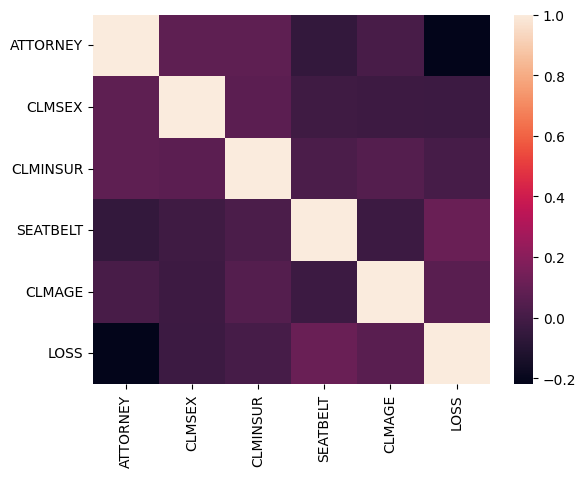

In [5]:
sns.heatmap(df.corr())

In [6]:
df.corr()

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
ATTORNEY,1.000000,0.079674,0.079439,-0.057189,0.010680,-0.219715
CLMSEX,0.079674,1.000000,0.066413,-0.015024,-0.023195,-0.027611
CLMINSUR,0.079439,0.066413,1.000000,0.021154,0.049493,0.005821
SEATBELT,-0.057189,-0.015024,0.021154,1.000000,-0.027992,0.111189
CLMAGE,0.010680,-0.023195,0.049493,-0.027992,1.000000,0.064612
LOSS,-0.219715,-0.027611,0.005821,0.111189,0.064612,1.000000


In [7]:
df.head(5)

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0,0.0,1.0,0.0,50.0,34.940
1,1,1.0,0.0,0.0,18.0,0.891
2,1,0.0,1.0,0.0,5.0,0.330
3,0,0.0,1.0,1.0,31.0,0.037
4,1,0.0,1.0,0.0,30.0,0.038


In [8]:
df.corr()

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
ATTORNEY,1.000000,0.079674,0.079439,-0.057189,0.010680,-0.219715
CLMSEX,0.079674,1.000000,0.066413,-0.015024,-0.023195,-0.027611
CLMINSUR,0.079439,0.066413,1.000000,0.021154,0.049493,0.005821
SEATBELT,-0.057189,-0.015024,0.021154,1.000000,-0.027992,0.111189
CLMAGE,0.010680,-0.023195,0.049493,-0.027992,1.000000,0.064612
LOSS,-0.219715,-0.027611,0.005821,0.111189,0.064612,1.000000


In [9]:
df.isna().sum()

ATTORNEY      0
CLMSEX       12
CLMINSUR     41
SEATBELT     48
CLMAGE      189
LOSS          0
dtype: int64

In [10]:
df.mean()

ATTORNEY     0.488806
CLMSEX       0.558735
CLMINSUR     0.907621
SEATBELT     0.017028
CLMAGE      28.414422
LOSS         3.806307
dtype: float64

In [11]:
df1 = df.dropna()

In [12]:
df1.isna().sum()

ATTORNEY    0
CLMSEX      0
CLMINSUR    0
SEATBELT    0
CLMAGE      0
LOSS        0
dtype: int64

In [13]:
df1.corr()

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
ATTORNEY,1.000000,0.097475,0.084609,-0.060795,0.001132,-0.225769
CLMSEX,0.097475,1.000000,0.058164,-0.017814,-0.017942,-0.029742
CLMINSUR,0.084609,0.058164,1.000000,0.021217,0.048166,0.019502
SEATBELT,-0.060795,-0.017814,0.021217,1.000000,-0.028343,0.131182
CLMAGE,0.001132,-0.017942,0.048166,-0.028343,1.000000,0.065513
LOSS,-0.225769,-0.029742,0.019502,0.131182,0.065513,1.000000


In [14]:
X = df1.drop('ATTORNEY',axis=1)
Y = df1['ATTORNEY']

In [15]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X,Y, train_size=0.7, random_state=12345)

In [16]:
def build_logi_regr():
    from sklearn.linear_model import LogisticRegressionCV
    
    model =LogisticRegressionCV()
    model.fit(xtrain,ytrain)
    return model

In [17]:
def nBayes():
    from sklearn.naive_bayes import GaussianNB
    model = GaussianNB()
    model.fit(xtrain,ytrain)
    return model

In [18]:
def knn():
    from sklearn.neighbors import KNeighborsClassifier
    model = KNeighborsClassifier(n_neighbors=7)
    model.fit(xtrain,ytrain)
    return model

In [19]:
def svmModel():
    from sklearn.svm import SVC
    model = SVC()
    model.fit(xtrain,ytrain)
    return model

In [20]:
logi_model = build_logi_regr()
nBayes_model = nBayes()
knn_model = knn()
svm_model= svmModel()


## evaluation

In [21]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score, recall_score
def evaluate(model):
    y_true = ytest
    y_pred = model.predict(xtest)
      
    cm = confusion_matrix(y_true, y_pred)
    print(cm)

    
    print(f"accuracy = {accuracy_score(y_true, y_pred) * 100:.2f}%")
    print(f"precision = {precision_score(y_true, y_pred) * 100:.2f}%")
    print(f"recall = {recall_score(y_true, y_pred) * 100:.2f}%")
    print(f"F1 score = {f1_score(y_true, y_pred) * 100:.2f}%")

In [22]:
evaluate(logi_model)

[[111  70]
 [ 30 118]]
accuracy = 69.60%
precision = 62.77%
recall = 79.73%
F1 score = 70.24%


In [23]:
evaluate(nBayes_model)

[[ 39 142]
 [  7 141]]
accuracy = 54.71%
precision = 49.82%
recall = 95.27%
F1 score = 65.43%


In [24]:
evaluate(knn_model)

[[127  54]
 [ 45 103]]
accuracy = 69.91%
precision = 65.61%
recall = 69.59%
F1 score = 67.54%


In [25]:
evaluate(svm_model)

[[ 92  89]
 [ 28 120]]
accuracy = 64.44%
precision = 57.42%
recall = 81.08%
F1 score = 67.23%
